# Data Exploration

In [100]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from config import val_split_seed


In [102]:
a = pd.read_csv("./BankA.csv")
b = pd.read_csv("./BankB.csv")
c = pd.read_csv("./BankC.csv")

In [103]:
a_samp = a.sample(n=100)
b_samp = b.sample(n=100)
c_samp = c.sample(n=100)

# a_b_samp = a_samp.append(b_samp, ignore_index=True)
# all_samp = a_b_samp.append(c_samp, ignore_index=True)

all_samp = pd.concat([a_samp, b_samp, c_samp], ignore_index=True)

c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

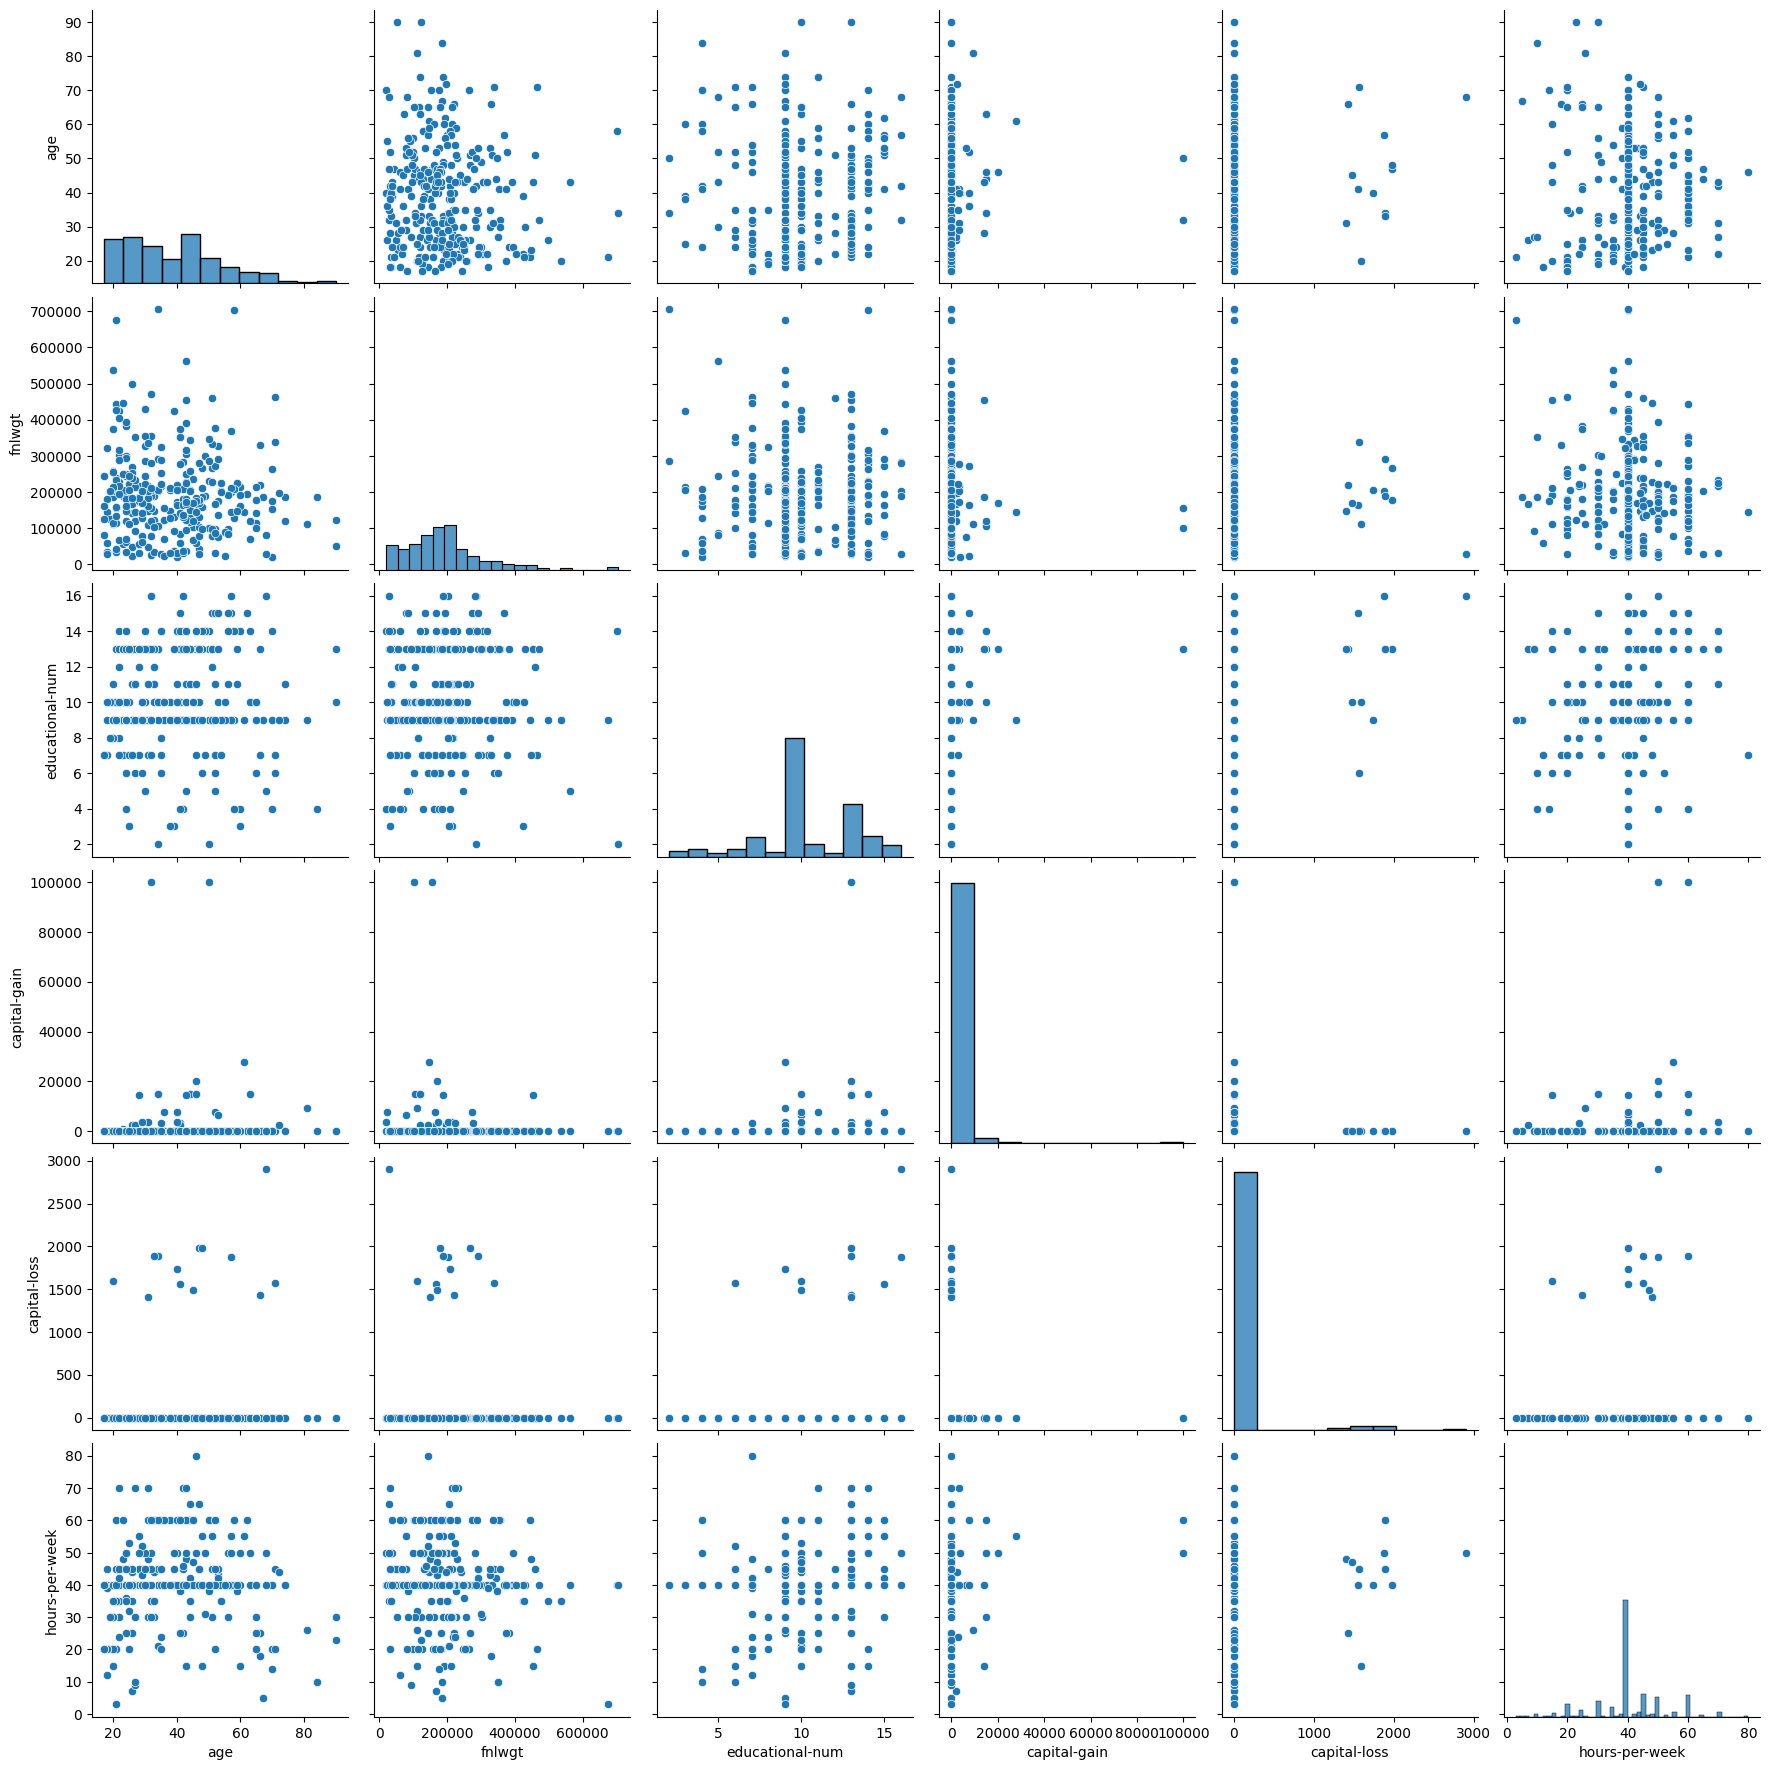

In [104]:
sns.pairplot(all_samp, height=3);

In [105]:
profile = ProfileReport(all_samp, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
all_samp.head(3)

institute  age workclass  fnlwgt     education  educational-num  \
0    Bank A   45   Private  102462  Some-college               10   
1    Bank A   50   Private  229328       Masters               14   
2    Bank A   30   Private  285468       Masters               14   

          marital-status       occupation   relationship   race  gender  \
0  Married-spouse-absent     Adm-clerical  Not-in-family  White  Female   
1               Divorced  Exec-managerial  Not-in-family  White  Female   
2          Never-married   Prof-specialty  Not-in-family  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              60  United-States  <=50K  
1             0             0              60  United-States  <=50K  
2             0             0              40  United-States  <=50K

In [107]:
# Native Country (Rassistisch?)
# Gender (sexismus)
# Race (Rassistisch!)
# Relationship (Husband, Wife einfach zu Married?)
# Educational-num oder education weg, je nach dem ob one hot encoding oder nicht

In [108]:
df = pd.concat([a, b, c], ignore_index=True)

In [109]:
drop_this = ["institute","education","race","gender","native-country"]
df = df.drop(drop_this, axis = 1)

In [110]:
df.loc[df["relationship"].isin(["Husband", "Wife"]), "relationship"] = "Married"

In [111]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
income             object
dtype: object

In [112]:
df = pd.get_dummies(df, columns=["workclass", "marital-status", "occupation", "relationship"])

In [113]:
df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   39  208353               13          7298             0              50   
1   42  189986               13             0             0              55   
2   56  321827               13             0             0              15   
3   34   33945               13             0             0              40   
4   66   31438               13         15024             0              40   

  income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0   >50K        False                  False                False  ...   
1   >50K        False                  False                False  ...   
2  <=50K         True                  False                False  ...   
3  <=50K        False                  False                False  ...   
4   >50K        False                  False                False  ...   

   occupation_Prof-specialty  occupation_Protective-serv  occupation_Sales  \
0                      False                       False             False   
1                      False                       False             False   
2                      False                       False             False   
3                      False                       False              True   
4                      False                       False              True   

   occupation_Tech-support  occupation_Transport-moving  relationship_Married  \
0                    False                        False                  True   
1                     True                        False                  True   
2                    False                        False                 False   
3                    False                        False                  True   
4                    False                        False                  True   

   relationship_Not-in-family  relationship_Other-relative  \
0                       False                        False   
1                       False                        False   
2                       False                         True   
3                       False                        False   
4                       False                        False   

   relationship_Own-child  relationship_Unmarried  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  

[5 rows x 43 columns]

In [114]:
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=val_split_seed)

In [115]:
# Modelle für Klassifikation
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42),
          'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

# Evaluation Metriken für Klassifikation
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Cohen\'s Kappa': []}

# Modellentwicklung und Evaluation
for model_name, model in models.items():
    # Modell anpassen
    model.fit(X_train, y_train)
    
    # Vorhersagen
    predictions = model.predict(X_test)
    
    # Metriken
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='>50K')
    recall = recall_score(y_test, predictions, pos_label='>50K')
    f1 = f1_score(y_test, predictions, pos_label='>50K')
    kappa = cohen_kappa_score(y_test, predictions)
    
    # Ergebnisse speichern
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Cohen\'s Kappa'].append(kappa)
    
    # Metriken anzeigen
    print("Klassifikationsbericht:\n", classification_report(y_test, predictions))
    print(f"{model_name}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\nCohen's Kappa: {kappa:.2f}\n{'='*40}")

# Ergebnisse in ein DataFrame konvertieren, um sie besser zu visualisieren
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

c:\Users\Fabian\anaconda3\envs\FML_2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87    120205
        >50K       0.71      0.27      0.39     39795

    accuracy                           0.79    160000
   macro avg       0.75      0.62      0.63    160000
weighted avg       0.78      0.79      0.75    160000

Logistic Regression
Accuracy: 0.79
Precision: 0.71
Recall: 0.27
F1 Score: 0.39
Cohen's Kappa: 0.29
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87    120205
        >50K       0.61      0.62      0.61     39795

    accuracy                           0.81    160000
   macro avg       0.74      0.74      0.74    160000
weighted avg       0.81      0.81      0.81    160000

Decision Tree
Accuracy: 0.81
Precision: 0.61
Recall: 0.62
F1 Score: 0.61
Cohen's Kappa: 0.48
Klassifikationsbericht:
               precision    recall  f1-score   support

       <=50K       0.88 

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756

In [116]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Für binäre Klassifikation

# Kompilieren des Modells
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=[
                    'accuracy', 
                    tf.keras.metrics.Recall(thresholds=0.5),
                    tf.keras.metrics.Precision(thresholds=0.5)
                ])

# Konvertieren der Daten in Tensoren (sollte das auf 0-1 skaliert sein?)
X_train_tensor = tf.convert_to_tensor(np.asarray(X_train).astype('float32'))
y_train_tensor = tf.convert_to_tensor(np.asarray(y_train).astype('float32'))
X_test_tensor = tf.convert_to_tensor(np.asarray(X_test).astype('float32'))
y_test_tensor = tf.convert_to_tensor(np.asarray(y_test).astype('float32'))

# Trainieren des Modells
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32)

# Bewertung des Modells
loss, accuracy, recall, precision = model.evaluate(X_test_tensor, y_test_tensor)

results['Model'].append('Neural Network')
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results['F1 Score'].append(np.nan)
results['Cohen\'s Kappa'].append(np.nan)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Epoch 1/10
20000/20000 [==============================] - 12s 584us/step - loss: 56.9555 - accuracy: 0.6865
Epoch 2/10
20000/20000 [==============================] - 12s 587us/step - loss: 7.9776 - accuracy: 0.7268
Epoch 3/10
20000/20000 [==============================] - 12s 587us/step - loss: 0.8282 - accuracy: 0.7628
Epoch 4/10
20000/20000 [==============================] - 12s 590us/step - loss: 0.4967 - accuracy: 0.7908
Epoch 5/10
20000/20000 [==============================] - 12s 594us/step - loss: 0.4957 - accuracy: 0.7904
Epoch 6/10
20000/20000 [==============================] - 12s 614us/step - loss: 0.4951 - accuracy: 0.7947
Epoch 7/10
20000/20000 [==============================] - 12s 594us/step - loss: 0.4946 - accuracy: 0.7953
Epoch 8/10
20000/20000 [==============================] - 12s 592us/step - loss: 0.4992 - accuracy: 0.7931
Epoch 9/10
20000/20000 [==============================] - 12s 587us/step - loss: 0.4970 - accuracy: 0.7944
Epoch 10/10
5000/5000 [=============

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756
4       Neural Network  0.788694        NaN       NaN       NaN            NaN

# Neural Network

In [118]:
input_shape = [X_train.shape[1]]

In [119]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [120]:
from tensorflow import keras
from tensorflow.keras import layers

In [121]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    # layers.Dense(1028, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    # layers.Dense(512, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [122]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',
            tf.keras.metrics.Recall(thresholds=0.5),
            tf.keras.metrics.Precision(thresholds=0.5)
            ],
)

In [123]:
# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.3531 - binary_accuracy: 0.8373 - recall_2: 0.5827 - precision_2: 0.7095 - val_loss: 0.3432 - val_binary_accuracy: 0.8385 - val_recall_2: 0.5101 - val_precision_2: 0.7621
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3442 - binary_accuracy: 0.8417 - recall_2: 0.5829 - precision_2: 0.7251 - val_loss: 0.3417 - val_binary_accuracy: 0.8402 - val_recall_2: 0.6205 - val_precision_2: 0.7022
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3408 - binary_accuracy: 0.8431 - recall_2: 0.5870 - precision_2: 0.7279 - val_loss: 0.3390 - val_binary_accuracy: 0.8426 - val_recall_2: 0.5826 - val_precision_2: 0.7302
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3397 - binary_accuracy: 0.8432 - recall_2: 0.5887 - precision_2: 0.7272 - val_loss: 0.3388 - val_binary_accuracy: 0.8423 - val_recall_2: 0.5872 - val_precision_2: 0.7

In [124]:
loss, accuracy, reacall, precision = model.evaluate(X_test, y_test)

   1/5000 [..............................] - ETA: 1:09 - loss: 0.4180 - binary_accuracy: 0.7500 - recall_2: 0.7500 - precision_2: 0.6429

5000/5000 [==============================] - 3s 583us/step - loss: 0.3374 - binary_accuracy: 0.8427 - recall_2: 0.5933 - precision_2: 0.7243


In [125]:
results['Model'].append('Neural Network_V2')
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(reacall)
results['F1 Score'].append(np.nan)
results['Cohen\'s Kappa'].append(np.nan)
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
3    Gradient Boosting  0.858187   0.784694  0.592361  0.675096       0.586646
5    Neural Network_V2  0.842687   0.724330  0.593316       NaN            NaN
2        Random Forest  0.841025   0.709077  0.611861  0.656892       0.554165
1        Decision Tree  0.806288   0.609299  0.616434  0.612846       0.483680
0  Logistic Regression  0.790112   0.706673  0.266918  0.387480       0.290756
4       Neural Network  0.788694        NaN       NaN       NaN            NaN

<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

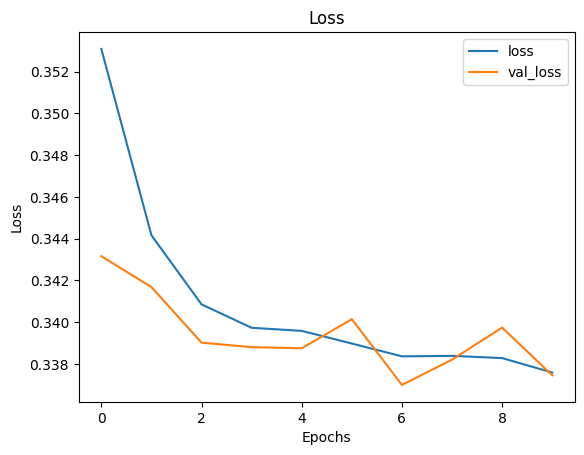

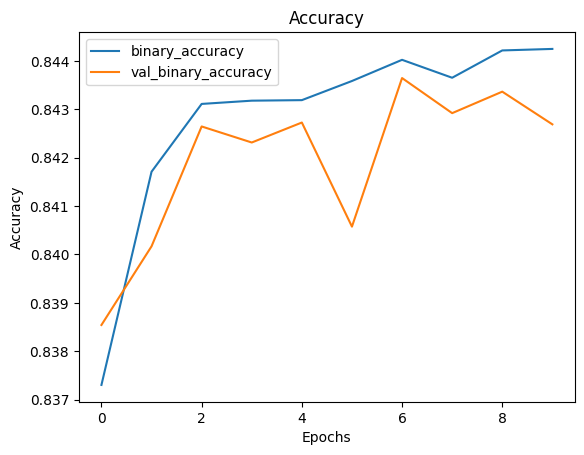

In [126]:
history_df = pd.DataFrame(history.history)
loss = history_df.loc[:, ['loss', 'val_loss']]
acc = history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']]
loss.plot(title="Loss", xlabel='Epochs', ylabel='Loss')
acc.plot(title="Accuracy", xlabel='Epochs', ylabel='Accuracy')

# Machine Learning Methods

In [155]:

# Load BankA.csv
bankA_df = pd.read_csv('BankA.csv')
print(bankA_df.shape)

# Load BankB.csv
bankB_df = pd.read_csv('BankB.csv')
print(bankB_df.shape)

# Load BankC.csv
bankC_df = pd.read_csv('BankC.csv')
print(bankC_df.shape)

all_banks_df = pd.concat([bankA_df, bankB_df, bankC_df], ignore_index=True)
print(all_banks_df.shape)


(226164, 16)
(403240, 16)
(170595, 16)
(799999, 16)


In [156]:
np.random.seed(42) 

In [157]:
bankA_df.head(3)

institute  age workclass  fnlwgt  education  educational-num  \
0    Bank A   39   Private  208353  Bachelors               13   
1    Bank A   42   Private  189986  Bachelors               13   
2    Bank A   56         ?  321827  Bachelors               13   

          marital-status       occupation    relationship   race  gender  \
0     Married-civ-spouse  Exec-managerial         Husband  White    Male   
1     Married-civ-spouse     Tech-support         Husband  White    Male   
2  Married-spouse-absent                ?  Other-relative  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          7298             0              50  United-States   >50K  
1             0             0              55  United-States   >50K  
2             0             0              15  United-States  <=50K

In [158]:
# Define function to split data into train and test sets

def split_data(df):
    # Drop "race" and "gender" columns
    df_processed = df.drop(['race', 'gender'], axis=1)
    
    # Encode categorical variables
    label_encoders = {}
    for column in df_processed.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df_processed[column] = label_encoders[column].fit_transform(df_processed[column])
    
    # Split data into features and target variable
    X = df_processed.drop('income', axis=1)
    y = df_processed['income']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


In [159]:
# Split data for Bank A
X_trainA, X_testA, y_trainA, y_testA = split_data(bankA_df)

# Split data for Bank B
X_trainB, X_testB, y_trainB, y_testB = split_data(bankB_df)

# Split data for Bank C
X_trainC, X_testC, y_trainC, y_testC = split_data(bankC_df)

# Split data for Bank C
X_train_all, X_test_all, y_train_all, y_test_all = split_data(all_banks_df)


In [162]:
# Define function to train logistic regression model
def train_model(X_train, X_test, y_train, y_test, model):
    # Train model
    model.fit(X_train, y_train)
    
    # Evaluate model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # precision = precision_score(y_test, predictions, pos_label='>50K')
    precision = np.nan
    # recall = recall_score(y_test, predictions, pos_label='>50K')
    recall = np.nan
    # f1 = f1_score(y_test, predictions, pos_label='>50K')
    f1 = np.nan
    kappa = cohen_kappa_score(y_test, predictions)

    metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'kappa': kappa}

    
    return model, train_score, test_score, metrics


## Train Models for each Bank separately

In [163]:
# LogReg = LogisticRegression(max_iter=1000)

# Train logistic regression models for each dataframe
bankA_model_log, bankA_train_score_log, bankA_test_score_log, _metrics = train_model(X_trainA, X_testA, y_trainA, y_testA, model=LogisticRegression(max_iter=1000))
bankB_model_log, bankB_train_score_log, bankB_test_score_log, _metrics = train_model(X_trainB, X_testB, y_trainB, y_testB, model=LogisticRegression(max_iter=1000))
bankC_model_log, bankC_train_score_log, bankC_test_score_log, _metrics = train_model(X_trainC, X_testC, y_trainC, y_testC, model=LogisticRegression(max_iter=1000))

# Display training and testing scores for each model
print("Bank A - Training Score:", bankA_train_score_log)
print("Bank A - Testing Score:", bankA_test_score_log)
print("Bank B - Training Score:", bankB_train_score_log)
print("Bank B - Testing Score:", bankB_test_score_log)
print("Bank C - Training Score:", bankC_train_score_log)
print("Bank C - Testing Score:", bankC_test_score_log)

Bank A - Training Score: 0.7562827818339588
Bank A - Testing Score: 0.7540512457718922
Bank B - Training Score: 0.8267532982839004
Bank B - Testing Score: 0.8252777502231922
Bank C - Training Score: 0.861939095518626
Bank C - Testing Score: 0.8623054603007122


In [164]:
# Create SVC model
# svm_model = SVC()

# Train SVM models for each dataframe
#TODO WARUM NUR 1/10 DER DATEN?!!
#TODO WARUM NICHT GESAMPLET?!!
bankA_model_svm, bankA_train_score_svm, bankA_test_score_svm, _metrics = train_model(X_trainA[:len(X_trainA)//10], X_testA, y_trainA[:len(X_trainA)//10], y_testA, model=SVC())
print('BankA Training finished')
bankB_model_svm, bankB_train_score_svm, bankB_test_score_svm, _metrics = train_model(X_trainB[:len(X_trainB)//10], X_testB, y_trainB[:len(X_trainB)//10], y_testB, model=SVC())
print('BankB Training finished')
bankC_model_svm, bankC_train_score_svm, bankC_test_score_svm, _metrics = train_model(X_trainC[:len(X_trainC)//10], X_testC, y_trainC[:len(X_trainC)//10], y_testC, model=SVC())
print('BankC Training finished')

# Display training and testing scores for each model
print("Bank A - Training Score:", bankA_train_score_svm)
print("Bank A - Testing Score:", bankA_test_score_svm)
print("Bank B - Training Score:", bankB_train_score_svm)
print("Bank B - Testing Score:", bankB_test_score_svm)
print("Bank C - Training Score:", bankC_train_score_svm)
print("Bank C - Testing Score:", bankC_test_score_svm)

BankA Training finished
BankB Training finished
BankC Training finished
Bank A - Training Score: 0.8114187807439341
Bank A - Testing Score: 0.808944796940287
Bank B - Training Score: 0.8406646207259989
Bank B - Testing Score: 0.8418683662335086
Bank C - Training Score: 0.8762365355023082
Bank C - Testing Score: 0.8722119640083238


## Train Centralized Models

In [165]:
all_banks_model_log, all_banks_train_score_log, all_banks_test_score_log, metrics = train_model(X_train_all, X_test_all, y_train_all, y_test_all, model=LogisticRegression(max_iter=1000))
print("All Banks - Training Score:", bankA_train_score_log)
print("All Banks - Testing Score:", bankA_test_score_log)

results['Model'].append('Logistic Regression (D)')
results['Accuracy'].append(metrics['accuracy'])
results['Precision'].append(metrics['precision'])
results['Recall'].append(metrics['recall'])
results['F1 Score'].append(metrics['f1'])
results['Cohen\'s Kappa'].append(metrics['kappa'])
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

All Banks - Training Score: 0.7562827818339588
All Banks - Testing Score: 0.7540512457718922


Model  Accuracy  Precision    Recall  F1 Score  \
3        Gradient Boosting  0.858187   0.784694  0.592361  0.675096   
5        Neural Network_V2  0.842687   0.724330  0.593316       NaN   
2            Random Forest  0.841025   0.709077  0.611861  0.656892   
6  Logistic Regression (D)  0.814412        NaN       NaN       NaN   
1            Decision Tree  0.806288   0.609299  0.616434  0.612846   
0      Logistic Regression  0.790112   0.706673  0.266918  0.387480   
4           Neural Network  0.788694        NaN       NaN       NaN   

   Cohen's Kappa  
3       0.586646  
5            NaN  
2       0.554165  
6       0.425516  
1       0.483680  
0       0.290756  
4            NaN

In [166]:
all_banks_model_svm, all_banks_train_score_svm, all_banks_test_score_svm, metrics = train_model(X_train_all[:len(X_train_all)//10], X_test_all, y_train_all[:len(y_train_all)//10], y_test_all, model=SVC())
print("All Banks - Training Score:", all_banks_train_score_svm)
print("All Banks - Testing Score:", all_banks_test_score_svm)

results['Model'].append('SVC')
results['Accuracy'].append(metrics['accuracy'])
results['Precision'].append(metrics['precision'])
results['Recall'].append(metrics['recall'])
results['F1 Score'].append(metrics['f1'])
results['Cohen\'s Kappa'].append(metrics['kappa'])
pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

All Banks - Training Score: 0.8435756808700136
All Banks - Testing Score: 0.84310625


Model  Accuracy  Precision    Recall  F1 Score  \
3        Gradient Boosting  0.858187   0.784694  0.592361  0.675096   
7                      SVC  0.843106        NaN       NaN       NaN   
5        Neural Network_V2  0.842687   0.724330  0.593316       NaN   
2            Random Forest  0.841025   0.709077  0.611861  0.656892   
6  Logistic Regression (D)  0.814412        NaN       NaN       NaN   
1            Decision Tree  0.806288   0.609299  0.616434  0.612846   
0      Logistic Regression  0.790112   0.706673  0.266918  0.387480   
4           Neural Network  0.788694        NaN       NaN       NaN   

   Cohen's Kappa  
3       0.586646  
7       0.540731  
5            NaN  
2       0.554165  
6       0.425516  
1       0.483680  
0       0.290756  
4            NaN